# Exploratory Data Analysis
### business dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# load business dataset
businesses = pd.read_csv('business.csv')
businesses.head()

,business_id,name,address,city,state,postal code,latitude,longitude,stars,review_count,is_open,categories
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,NaN,33.522143,-112.018481,3.0,5,0,"Golf, Active Life"
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,NaN,43.605499,-79.652289,2.5,128,1,"Specialty Food, Restaurants, Dim Sum, Imported..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,NaN,35.092564,-80.859132,4.0,170,1,"Sushi Bars, Restaurants, Japanese"
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,NaN,33.455613,-112.395596,5.0,3,1,"Insurance, Financial Services"
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,NaN,35.190012,-80.887223,4.0,4,1,"Plumbing, Shopping, Local Services, Home Servi..."


***Most Popular States***

In [7]:
# states represented in the business dataset 

states = businesses.state.unique()
print(states)

['AZ' 'ON' 'NC' 'AB' 'NV' 'OH' 'PA' 'QC' 'WI' 'IL' 'NY' 'SC' 'TX' 'UT'
 'NM' 'FL' 'CA' 'VA' 'BAS' 'NE' 'AK' 'XGM' 'WA' 'XWY' 'CON' 'BC' 'GA' 'VT'
 'CT' 'AL' 'DUR' 'TN' 'NJ' 'AR' 'XGL' 'DOW']


In [8]:
state_counts = {}
for state in states:
    state_counts[state] = len(businesses[businesses['state'].str.contains(state)])

print(state_counts)

{'AZ': 56686, 'ON': 33413, 'NC': 14720, 'AB': 8012, 'NV': 36312, 'OH': 14697, 'PA': 11216, 'QC': 9219, 'WI': 5154, 'IL': 1932, 'NY': 22, 'SC': 1162, 'TX': 6, 'UT': 1, 'NM': 1, 'FL': 4, 'CA': 19, 'VA': 2, 'BAS': 1, 'NE': 2, 'AK': 2, 'XGM': 4, 'WA': 3, 'XWY': 2, 'CON': 1, 'BC': 1, 'GA': 2, 'VT': 2, 'CT': 3, 'AL': 3, 'DUR': 1, 'TN': 1, 'NJ': 1, 'AR': 1, 'XGL': 1, 'DOW': 1}


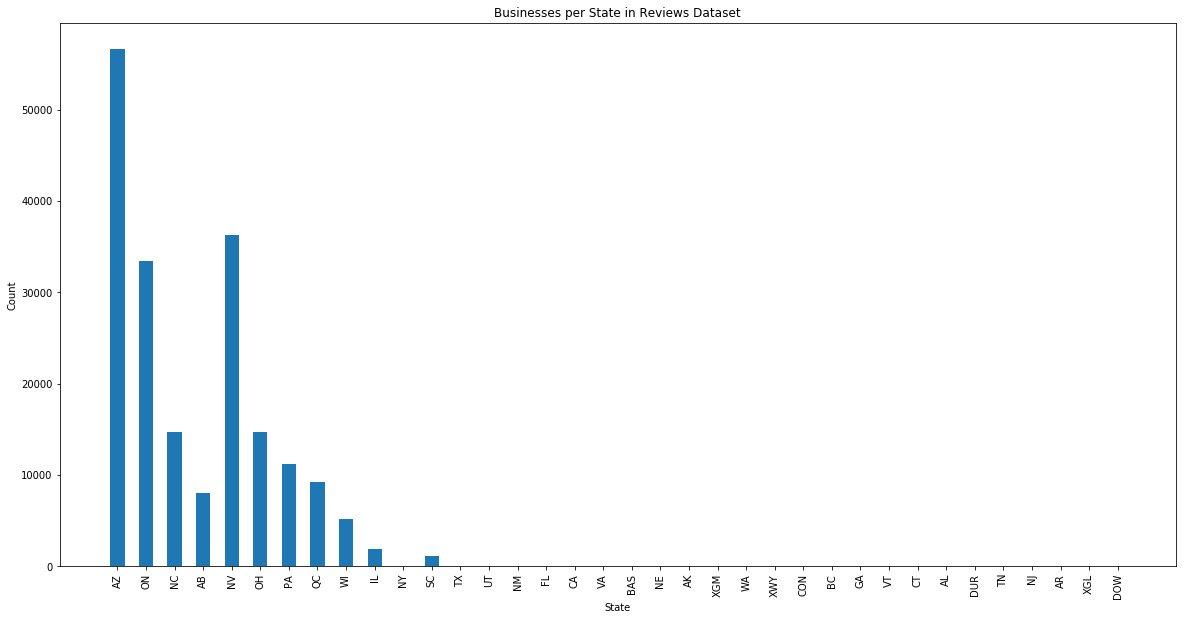

In [9]:
# barchart of representation by state

plt.figure(figsize=(20,10))
plt.title('Businesses per State in Reviews Dataset')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.bar(state_counts.keys(),state_counts.values(),0.5);
#plt.savefig('business_states_barchart.png')

***Top Categories***

In [75]:
categories = businesses.categories.value_counts()[:100]
#print(categories)

categories_dict = categories.to_dict()
print(categories_dict)

{'Restaurants, Pizza': 1042, 'Nail Salons, Beauty & Spas': 1031, 'Pizza, Restaurants': 993, 'Beauty & Spas, Nail Salons': 947, 'Food, Coffee & Tea': 888, 'Mexican, Restaurants': 885, 'Coffee & Tea, Food': 865, 'Restaurants, Mexican': 853, 'Chinese, Restaurants': 840, 'Hair Salons, Beauty & Spas': 831, 'Beauty & Spas, Hair Salons': 819, 'Restaurants, Chinese': 789, 'Automotive, Auto Repair': 585, 'Auto Repair, Automotive': 534, 'Food, Grocery': 492, 'Grocery, Food': 491, 'Restaurants, Italian': 474, 'Italian, Restaurants': 446, 'Banks & Credit Unions, Financial Services': 439, 'Financial Services, Banks & Credit Unions': 401, 'Ice Cream & Frozen Yogurt, Food': 395, 'Food, Ice Cream & Frozen Yogurt': 386, 'Beauty & Spas, Barbers': 374, 'Barbers, Beauty & Spas': 371, 'Real Estate, Apartments, Home Services': 340, 'Apartments, Real Estate, Home Services': 338, 'Apartments, Home Services, Real Estate': 335, 'Real Estate, Home Services, Apartments': 328, 'Home Services, Real Estate, Apartmen

In [110]:
# separate into single categories

category_list = []
for category_cluster in categories_dict.keys():
    temp_list = category_cluster.split(', ')
    #print(temp_list)
    
    for item in temp_list:
        if item not in category_list:
            category_list.append(item)
    
print(category_list)    

['Restaurants', 'Pizza', 'Nail Salons', 'Beauty & Spas', 'Food', 'Coffee & Tea', 'Mexican', 'Chinese', 'Hair Salons', 'Automotive', 'Auto Repair', 'Grocery', 'Italian', 'Banks & Credit Unions', 'Financial Services', 'Ice Cream & Frozen Yogurt', 'Barbers', 'Real Estate', 'Apartments', 'Home Services', 'Pets', 'Veterinarians', 'Bakeries', 'Car Rental', 'Hotels & Travel', 'American (Traditional)', 'Heating & Air Conditioning/HVAC', 'Vietnamese', 'Thai', 'Event Planning & Services', 'Hotels', 'Car Dealers', 'American (New)', 'Japanese', 'Health & Medical', 'Chiropractors', 'Beer', 'Wine & Spirits', 'Sandwiches', 'Indian', 'Burgers', 'Shopping', 'Jewelry', 'Gas Stations', 'Breakfast & Brunch', 'Active Life', 'Parks', 'Pest Control', 'Local Services', 'Fast Food', 'Car Wash', 'Auto Parts & Supplies', 'Self Storage', 'Nightlife', 'Bars', 'Movers', 'Churches', 'Religious Organizations', 'Doctors', 'Sushi Bars', 'Sewing & Alterations']


In [73]:
# get the counts in the entire dataframe for each of these catgories

#for category in category_list[0:2]:
#businesses.loc[businesses.categories == 'Restaurants']
string = "Golf" 
if string in businesses['categories'][0]:
    print(True)

    
print(businesses['categories'][0])

True
Golf, Active Life


In [111]:
category_counts = {}
for item in category_list:
    category_counts[item] = 0
print(category_counts)

{'Restaurants': 0, 'Pizza': 0, 'Nail Salons': 0, 'Beauty & Spas': 0, 'Food': 0, 'Coffee & Tea': 0, 'Mexican': 0, 'Chinese': 0, 'Hair Salons': 0, 'Automotive': 0, 'Auto Repair': 0, 'Grocery': 0, 'Italian': 0, 'Banks & Credit Unions': 0, 'Financial Services': 0, 'Ice Cream & Frozen Yogurt': 0, 'Barbers': 0, 'Real Estate': 0, 'Apartments': 0, 'Home Services': 0, 'Pets': 0, 'Veterinarians': 0, 'Bakeries': 0, 'Car Rental': 0, 'Hotels & Travel': 0, 'American (Traditional)': 0, 'Heating & Air Conditioning/HVAC': 0, 'Vietnamese': 0, 'Thai': 0, 'Event Planning & Services': 0, 'Hotels': 0, 'Car Dealers': 0, 'American (New)': 0, 'Japanese': 0, 'Health & Medical': 0, 'Chiropractors': 0, 'Beer': 0, 'Wine & Spirits': 0, 'Sandwiches': 0, 'Indian': 0, 'Burgers': 0, 'Shopping': 0, 'Jewelry': 0, 'Gas Stations': 0, 'Breakfast & Brunch': 0, 'Active Life': 0, 'Parks': 0, 'Pest Control': 0, 'Local Services': 0, 'Fast Food': 0, 'Car Wash': 0, 'Auto Parts & Supplies': 0, 'Self Storage': 0, 'Nightlife': 0, 'Ba

In [114]:
for row in businesses.itertuples():
    for category in category_list:
        #print(category, row.categories)
        if category in row.categories:
            print(category,'\t', row.categories)
            #print("found")
            category_counts[category] = category_counts[category]+ 1

Active Life 	 Golf, Active Life
Restaurants 	 Specialty Food, Restaurants, Dim Sum, Imported Food, Food, Chinese, Ethnic Food, Seafood
Food 	 Specialty Food, Restaurants, Dim Sum, Imported Food, Food, Chinese, Ethnic Food, Seafood
Chinese 	 Specialty Food, Restaurants, Dim Sum, Imported Food, Food, Chinese, Ethnic Food, Seafood
Restaurants 	 Sushi Bars, Restaurants, Japanese
Japanese 	 Sushi Bars, Restaurants, Japanese
Bars 	 Sushi Bars, Restaurants, Japanese
Sushi Bars 	 Sushi Bars, Restaurants, Japanese
Financial Services 	 Insurance, Financial Services
Home Services 	 Plumbing, Shopping, Local Services, Home Services, Kitchen & Bath, Home & Garden, Water Heater Installation/Repair
Shopping 	 Plumbing, Shopping, Local Services, Home Services, Kitchen & Bath, Home & Garden, Water Heater Installation/Repair
Local Services 	 Plumbing, Shopping, Local Services, Home Services, Kitchen & Bath, Home & Garden, Water Heater Installation/Repair
Local Services 	 Shipping Centers, Couriers & Del

Burgers 	 Fast Food, Sandwiches, Restaurants, Burgers
Fast Food 	 Fast Food, Sandwiches, Restaurants, Burgers
Automotive 	 Automotive, Auto Repair, Tires, Auto Parts & Supplies
Auto Repair 	 Automotive, Auto Repair, Tires, Auto Parts & Supplies
Auto Parts & Supplies 	 Automotive, Auto Repair, Tires, Auto Parts & Supplies
Event Planning & Services 	 Venues & Event Spaces, Event Planning & Services
Pets 	 Pet Sitting, Pet Groomers, Veterinarians, Pet Services, Pets
Veterinarians 	 Pet Sitting, Pet Groomers, Veterinarians, Pet Services, Pets
Restaurants 	 Restaurants, Canadian (New)
Automotive 	 Automotive, Car Wash
Car Wash 	 Automotive, Car Wash
Restaurants 	 Sandwiches, Restaurants, Delis, Desserts, Food
Food 	 Sandwiches, Restaurants, Delis, Desserts, Food
Sandwiches 	 Sandwiches, Restaurants, Delis, Desserts, Food
Restaurants 	 Breakfast & Brunch, Diners, Restaurants, Coffee & Tea, Food
Food 	 Breakfast & Brunch, Diners, Restaurants, Coffee & Tea, Food
Coffee & Tea 	 Breakfast & Brun

TypeError: argument of type 'float' is not iterable

In [115]:
print(category_counts)

{'Restaurants': 252, 'Pizza': 21, 'Nail Salons': 30, 'Beauty & Spas': 84, 'Food': 156, 'Coffee & Tea': 27, 'Mexican': 21, 'Chinese': 21, 'Hair Salons': 42, 'Automotive': 60, 'Auto Repair': 30, 'Grocery': 15, 'Italian': 27, 'Banks & Credit Unions': 12, 'Financial Services': 24, 'Ice Cream & Frozen Yogurt': 18, 'Barbers': 15, 'Real Estate': 21, 'Apartments': 9, 'Home Services': 63, 'Pets': 9, 'Veterinarians': 6, 'Bakeries': 18, 'Car Rental': 3, 'Hotels & Travel': 30, 'American (Traditional)': 27, 'Heating & Air Conditioning/HVAC': 6, 'Vietnamese': 6, 'Thai': 3, 'Event Planning & Services': 48, 'Hotels': 30, 'Car Dealers': 9, 'American (New)': 15, 'Japanese': 12, 'Health & Medical': 66, 'Chiropractors': 6, 'Beer': 18, 'Wine & Spirits': 12, 'Sandwiches': 36, 'Indian': 0, 'Burgers': 27, 'Shopping': 132, 'Jewelry': 12, 'Gas Stations': 3, 'Breakfast & Brunch': 27, 'Active Life': 30, 'Parks': 6, 'Pest Control': 0, 'Local Services': 42, 'Fast Food': 21, 'Car Wash': 9, 'Auto Parts & Supplies': 1

In [117]:
sorted_cat_counts = sorted(category_counts, key=category_counts.get, reverse=True)
print(sorted_cat_counts)

['Restaurants', 'Food', 'Shopping', 'Beauty & Spas', 'Bars', 'Health & Medical', 'Home Services', 'Automotive', 'Nightlife', 'Event Planning & Services', 'Hair Salons', 'Local Services', 'Sandwiches', 'Nail Salons', 'Auto Repair', 'Hotels & Travel', 'Hotels', 'Active Life', 'Coffee & Tea', 'Italian', 'American (Traditional)', 'Burgers', 'Breakfast & Brunch', 'Financial Services', 'Pizza', 'Mexican', 'Chinese', 'Real Estate', 'Fast Food', 'Doctors', 'Ice Cream & Frozen Yogurt', 'Bakeries', 'Beer', 'Grocery', 'Barbers', 'American (New)', 'Sushi Bars', 'Banks & Credit Unions', 'Japanese', 'Wine & Spirits', 'Jewelry', 'Auto Parts & Supplies', 'Apartments', 'Pets', 'Car Dealers', 'Car Wash', 'Veterinarians', 'Heating & Air Conditioning/HVAC', 'Vietnamese', 'Chiropractors', 'Parks', 'Car Rental', 'Thai', 'Gas Stations', 'Sewing & Alterations', 'Indian', 'Pest Control', 'Self Storage', 'Movers', 'Churches', 'Religious Organizations']


### user dataset

In [4]:
# load user dataset
users = pd.read_csv('user.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
users = users[['user_id','name','review_count','yelping_since', 'friends', 
               'useful', 'funny', 'cool', 'fans', 'elite', 'average_stars', 'compliment_hot',
               'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list',
               'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 
               'compliment_writer', 'compliment_photos' ]]
users.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",84,17,25,5,"2015,2016,2017",...,0,0,0,0,1,1,1,1,2,0
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",48,22,16,4,NaN,...,0,0,0,0,0,0,1,1,0,0
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04 00:16:10,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",28,8,10,0,NaN,...,0,0,0,0,1,0,0,0,0,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",30,4,14,5,NaN,...,0,0,0,0,0,2,0,0,1,0
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23 07:02:50,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",1114,279,665,39,"2015,2016,2017,2018",...,1,0,0,1,16,57,80,80,25,5


***Average Review Count***

In [118]:
users["review_count"].mean()

22.28769779945246

### Review Dataset (sample size = 10,000)

In [119]:
reviews_sample = pd.read_csv('reviews10000.csv')

In [120]:
reviews_sample.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,4694397,Llol4TRuLoVmCsbVSnuIDA,75JyTel9uUs7VNFhTmK56w,sPwgafejYVdf8hd4-oDYVg,1.0,2015-08-30 17:32:01,Awful. The lemon pepper wing sauce is black fo...,0,0,0
1,3142277,moHHEwAINiwsjohq6doYrQ,lhDgwKq2Gh8TIIyexubRag,9U4Tqt5SkZKQ6eeH6IPSxQ,5.0,2018-04-11 04:36:23,We had an awesome experience at hibachi. Our c...,0,0,1
2,2342009,6TF21--YL6ig6r0Oae1qGA,jpib9MAMB_aVxyCDUi9VAg,yFUvKpW66cNsYXD6inDsog,5.0,2015-01-27 03:54:16,I truly enjoy this neighborhood spot. Good foo...,0,0,0
3,3547267,MN2PqoIWECNmI3fuqdZyEA,bFF1HZzb8k3gimLHU52bQA,WnOVGJTu7RK0iWurrgiBNA,5.0,2018-06-28 19:06:47,Best tanning place around in NC\r\r\nHope and ...,0,0,0
4,4449537,MG4o8ke2G6VYXDy1HUCbIg,PT3whiZ1mW3psCz_lcp7ww,6BO1PcdtU6idqO0njUnCYA,1.0,2016-07-12 16:49:09,Staff is horrible. Last time I ordered from he...,0,0,1


***Reviewer Frequency***

In [138]:
num_reviews = reviews_sample["user_id"].value_counts(sort=True, ascending=False)
print('Maximum Number of Reviews per Reviewer:', round(num_reviews.max(),3))
print('Median Number of Reviews per Reviewer:', round(num_reviews.median(),3))
print('Average Number of Reviews per Reviewer:', round(num_reviews.mean(),3))

Maximum Number of Reviews per Reviewer: 12
Median Number of Reviews per Reviewer: 1.0
Average Number of Reviews per Reviewer: 1.034


***Reviews per business***

In [139]:
num_reviews_per_bus = reviews_sample["business_id"].value_counts(sort=True, ascending=False)
print('Maximum Number of Reviews per Business:', round(num_reviews_per_bus.max(),3))
print('Median Number of Reviews per Business:', round(num_reviews_per_bus.median(),3))
print('Average Number of Reviews per Business:', round(num_reviews_per_bus.mean(),3))

Maximum Number of Reviews per Business: 15
Median Number of Reviews per Business: 1.0
Average Number of Reviews per Business: 1.205


***Text Length***

In [141]:
reviews_sample['text length'] = reviews_sample['text'].apply(len)
reviews_sample.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool,text length
0,4694397,Llol4TRuLoVmCsbVSnuIDA,75JyTel9uUs7VNFhTmK56w,sPwgafejYVdf8hd4-oDYVg,1.0,2015-08-30 17:32:01,Awful. The lemon pepper wing sauce is black fo...,0,0,0,334
1,3142277,moHHEwAINiwsjohq6doYrQ,lhDgwKq2Gh8TIIyexubRag,9U4Tqt5SkZKQ6eeH6IPSxQ,5.0,2018-04-11 04:36:23,We had an awesome experience at hibachi. Our c...,0,0,1,209
2,2342009,6TF21--YL6ig6r0Oae1qGA,jpib9MAMB_aVxyCDUi9VAg,yFUvKpW66cNsYXD6inDsog,5.0,2015-01-27 03:54:16,I truly enjoy this neighborhood spot. Good foo...,0,0,0,146
3,3547267,MN2PqoIWECNmI3fuqdZyEA,bFF1HZzb8k3gimLHU52bQA,WnOVGJTu7RK0iWurrgiBNA,5.0,2018-06-28 19:06:47,Best tanning place around in NC\r\r\nHope and ...,0,0,0,165
4,4449537,MG4o8ke2G6VYXDy1HUCbIg,PT3whiZ1mW3psCz_lcp7ww,6BO1PcdtU6idqO0njUnCYA,1.0,2016-07-12 16:49:09,Staff is horrible. Last time I ordered from he...,0,0,1,233


In [142]:
print('Maximum Text Length:', round(reviews_sample['text length'].max(),3))
print('Minimum Text Length:', round(reviews_sample['text length'].min(),3))
print('Median Text Length:', round(reviews_sample['text length'].median(),3))
print('Average Text Length:', round(reviews_sample['text length'].mean(),3))

Maximum Text Length: 5426
Minimum Text Length: 6
Median Text Length: 428.0
Average Text Length: 608.025


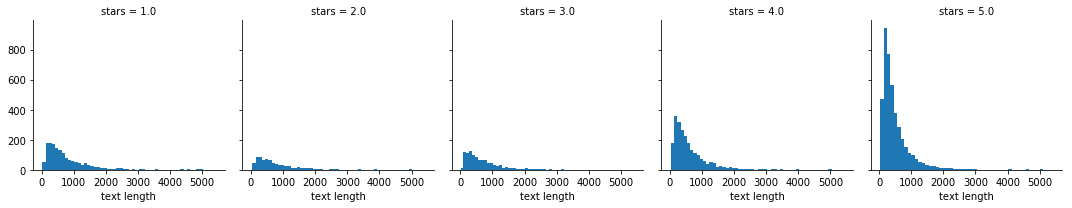

In [148]:
import seaborn as sns

g = sns.FacetGrid(data=reviews_sample, col='stars')
g.map(plt.hist, 'text length', bins=50)

***Number of Stars***

In [147]:
num_stars = reviews_sample["stars"].value_counts()
print(num_stars)

5.0    4364
4.0    2292
1.0    1534
3.0    1055
2.0     755
Name: stars, dtype: int64


In [143]:
print('Maximum Number of Stars:', round(reviews_sample['stars'].max(),3))
print('Minimum Number of Stars:', round(reviews_sample['stars'].min(),3))
print('Median Number of Stars:', round(reviews_sample['stars'].median(),3))
print('Average Number of Stars:', round(reviews_sample['stars'].mean(),3))

Maximum Number of Stars: 5.0
Minimum Number of Stars: 1.0
Median Number of Stars: 4.0
Average Number of Stars: 3.72
